<a href="https://colab.research.google.com/github/data2450/traffic-volume-prediction/blob/main/traffic_volume_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as ex
import plotly.graph_objs as go

In [ ]:
url='https://raw.githubusercontent.com/data2450/traffic-volume-prediction/main/TRAIN.csv'
url1='https://raw.githubusercontent.com/data2450/traffic-volume-prediction/main/TEST.csv'

* date_time  >--   DateTime Hour of the data collected in local CST time

* holiday >-- Categorical US National holidays plus regional holiday, Minnesota State Fair
* temp >-- Numeric Average temp in kelvin

* rain_1h >-- Numeric Amount in mm of rain that occurred in the hour

* snow_1h >-- Numeric Amount in mm of snow that occurred in the hour

* clouds_all >-- Numeric Percentage of cloud cover

* weather_main >-- Categorical Short textual description of the current weather
* weather_description >-- Categorical Longer textual description of the current weather

* traffic_volume >-- Numeric Hourly I-94 ATR 301 reported westbound traffic volume (Target)

In [ ]:
train=pd.read_csv(url)
train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
test=pd.read_csv(url1)
test.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist


#EDA

In [ ]:
print('shape of traindataset :',train.shape,'\n')
print('shape of testdataset :',test.shape)

shape of traindataset : (38563, 9) 

shape of testdataset : (9641, 8)


In [ ]:
train.info()
#we have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [ ]:
#lets simply describe the traindataset
train.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
train.describe(include='object')

,date_time,holiday,weather_main,weather_description
count,38563,38563,38563,38563
unique,32607,12,11,38
top,2013-05-19 10:00:00,None,Clouds,sky is clear
freq,6,38515,12680,8848


In [ ]:
print("max date :" +train.date_time.max())
print("min date :" +train.date_time.min())

max date :2017-11-01 20:00:00
min date :2012-10-02 09:00:00


data is collected for 6 yeras

# Univariate Analysis

In [ ]:
train.nunique()
#n.o of unique values in the columns

date_time              32607
holiday                   12
temp                    5670
rain_1h                  353
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
traffic_volume          6568
dtype: int64

**categorical variables**

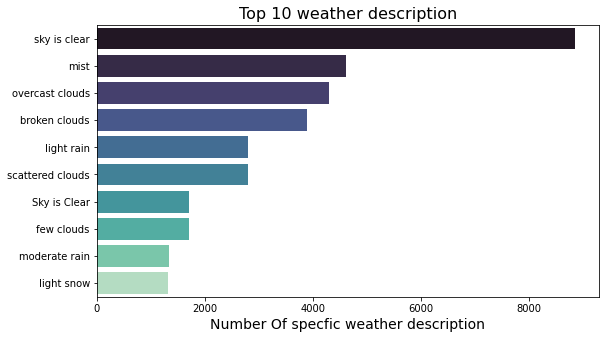

In [ ]:
#weather_description

#print(train.weather_description.value_counts())
#distribution
plt.figure(figsize=(9,5))
ax=sns.barplot(y=train['weather_description'].value_counts()[:10].index,x=train['weather_description'].value_counts()[:10].values,palette='mako')
ax.set_title('Top 10 weather description',fontsize=16)
ax.set_xlabel('Number Of specfic weather description',fontsize=14)
plt.show()


None                         38515
Labor Day                        5
Thanksgiving Day                 5
New Years Day                    5
Christmas Day                    5
Columbus Day                     5
Independence Day                 4
Veterans Day                     4
State Fair                       4
Washingtons Birthday             4
Memorial Day                     4
Martin Luther King Jr Day        3
Name: holiday, dtype: int64


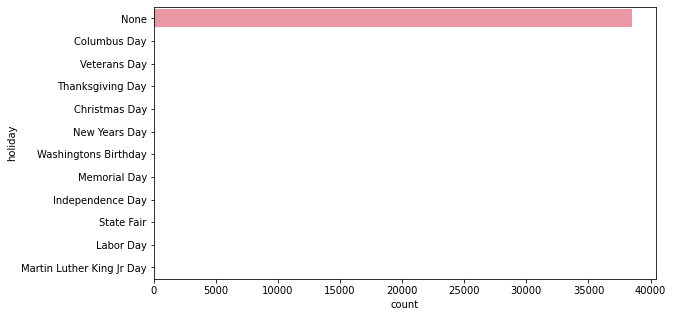

In [ ]:

#holiday

print(train.holiday.value_counts())
#distribution
plt.figure(figsize=(9,5))
sns.countplot(y = train.holiday)
plt.show()


we have lot of normal days than the special days

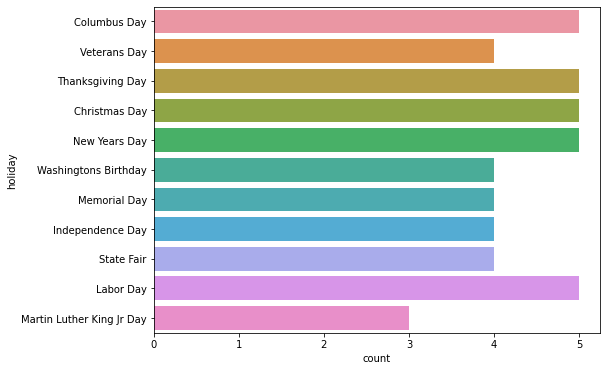

In [ ]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = train.loc[train.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

Clouds          12680
Clear           10560
Rain             4640
Mist             4611
Snow             2117
Drizzle          1482
Haze              993
Thunderstorm      765
Fog               693
Smoke              18
Squall              4
Name: weather_main, dtype: int64


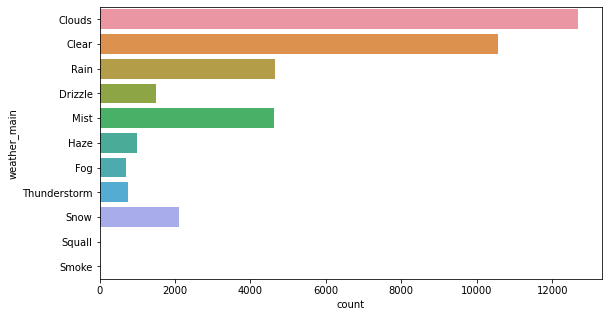

In [ ]:
#weather_main

print(train.weather_main.value_counts())
#distribution
plt.figure(figsize=(9,5))
sns.countplot(y= train.weather_main)
plt.show()


we have 38 type of weather_description in the dataset

**numerical varibles**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



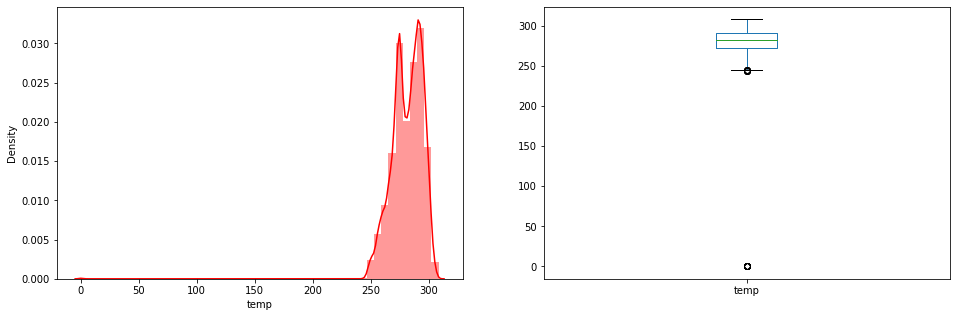

In [ ]:
#temperature
plt.subplot(121)
sns.distplot(train['temp'],color="r");

plt.subplot(122)
train['temp'].plot.box(figsize=(16,5))

plt.show()
#the temp feature have some outliers and its left skewed
#we should remove that outlier


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



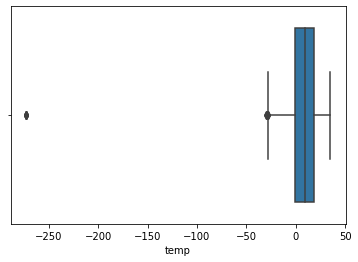

In [ ]:
#Temperature is measured in Kelvin, changing to degree celsius to make it more intuitive
#convert kelvin to celsius
#(0K − 273.15)
train['temp'] = (train['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = train)
plt.show()

In [ ]:


print('max threshold :',train['temp'].quantile(0.75))
print('min threshold :',train['temp'].quantile(0.25))

max threshold : 18.390000000000043
min threshold : -0.29199999999997317


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



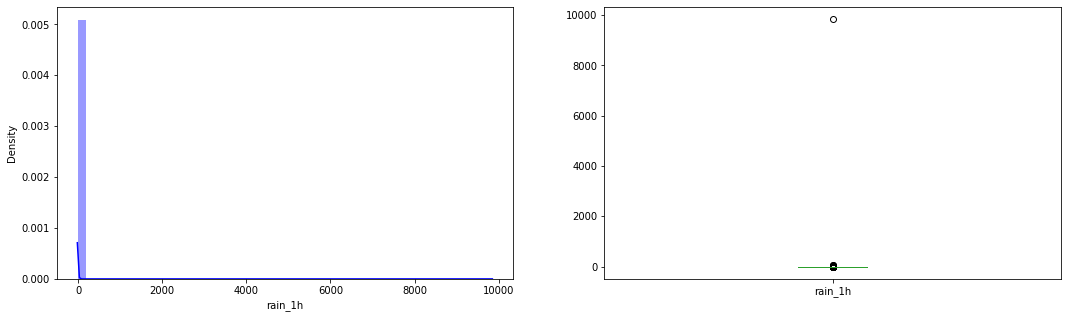

In [ ]:
#rain_1h

plt.subplot(121)
sns.distplot(train['rain_1h'],color="b");

plt.subplot(122)
train['rain_1h'].plot.box(figsize=(18,5))

plt.show()
#most of the observations are closer to zero

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



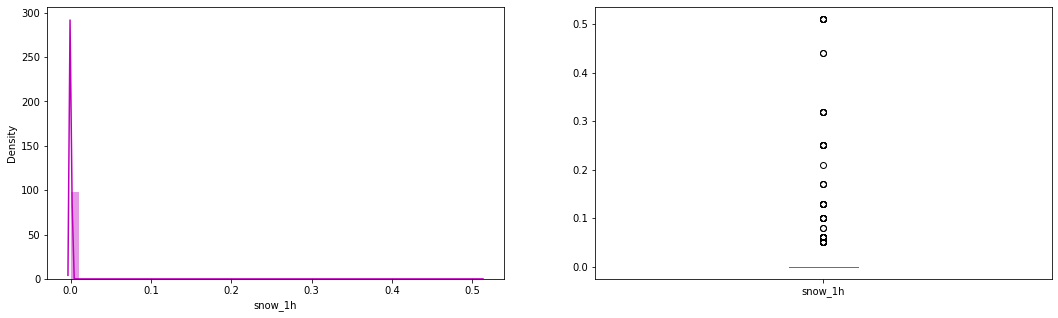

In [ ]:
#snow_1h

plt.subplot(121)
sns.distplot(train['snow_1h'],color="m");

plt.subplot(122)
train['snow_1h'].plot.box(figsize=(18,5))

plt.show()
#since majority of the hour is 0 snowfallrate ,we can see outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



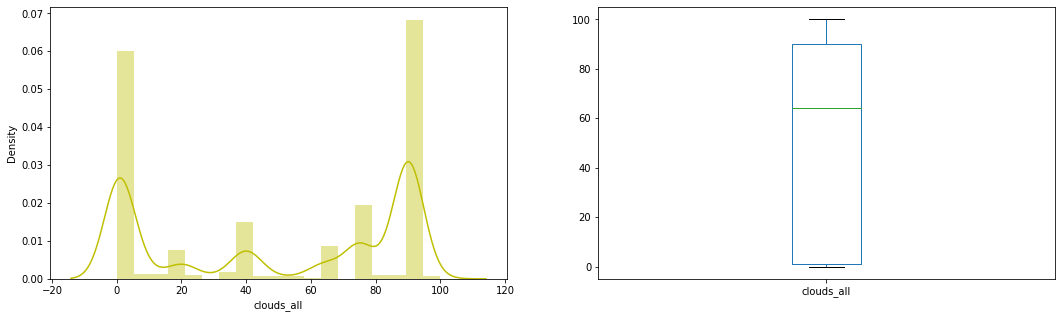

In [ ]:
#clouds_all

plt.subplot(121)
sns.distplot(train['clouds_all'],color="y");

plt.subplot(122)
train['clouds_all'].plot.box(figsize=(18,5))

plt.show()

#here we have no outliers atall

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



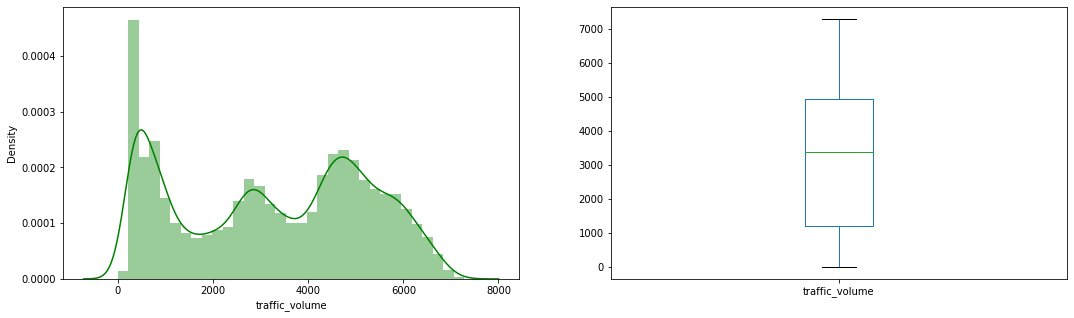

In [ ]:
#traffic_volume

plt.subplot(121)
sns.distplot(train['traffic_volume'],color="g");

plt.subplot(122)
train['traffic_volume'].plot.box(figsize=(18,5))

plt.show()


# Bivariate Analysis
Exploring variable with respect to target variable and categorical Independent variables

**Categorical Independent Variable vs Target Variable**

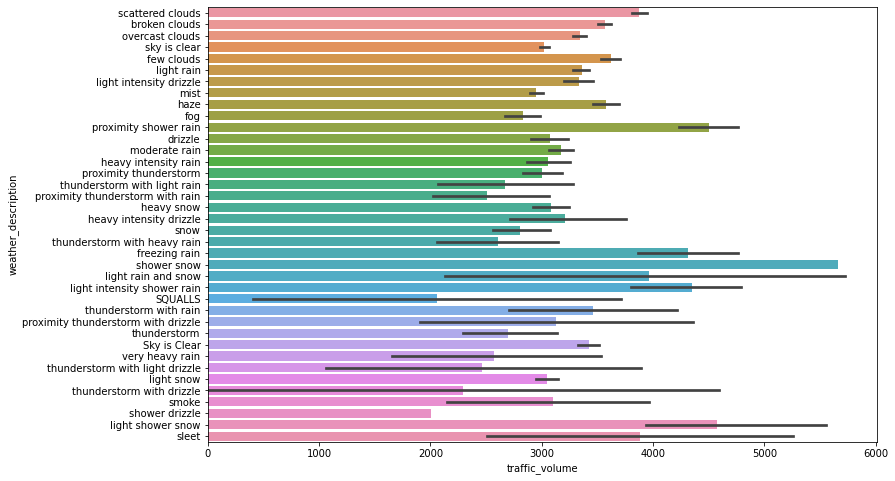

In [ ]:
#weather_description vs traffic_volume 

plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = train)
plt.show()

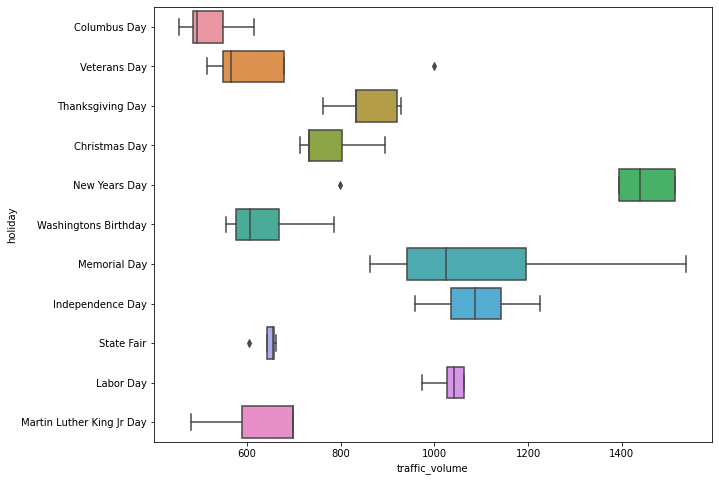

In [ ]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays )
plt.show()

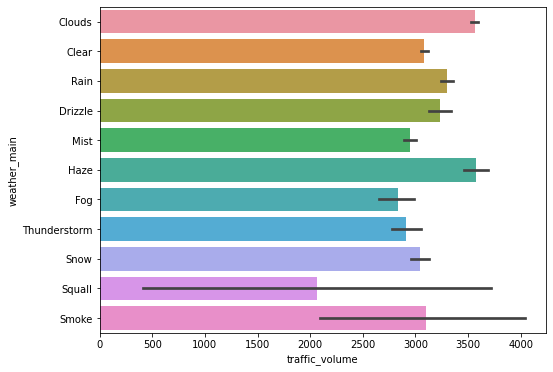

In [ ]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(y='weather_main', x = 'traffic_volume', data = train)
plt.show()

In [ ]:
train.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,8.201757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,-273.150000,0.000000,0.000000,0.000000,0.000000
25%,-0.292000,0.000000,0.000000,1.000000,1186.500000
50%,9.600000,0.000000,0.000000,64.000000,3378.000000
75%,18.390000,0.000000,0.000000,90.000000,4939.000000
max,35.090000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
features_n=['temp','rain_1h','snow_1h','clouds_all','traffic_volume']

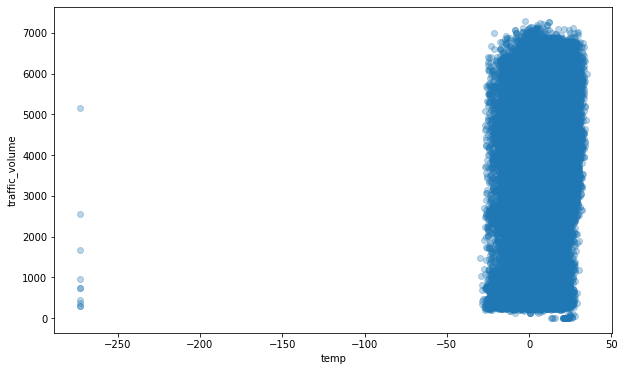

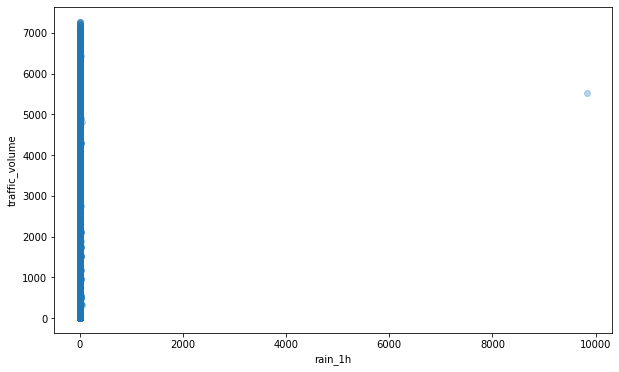

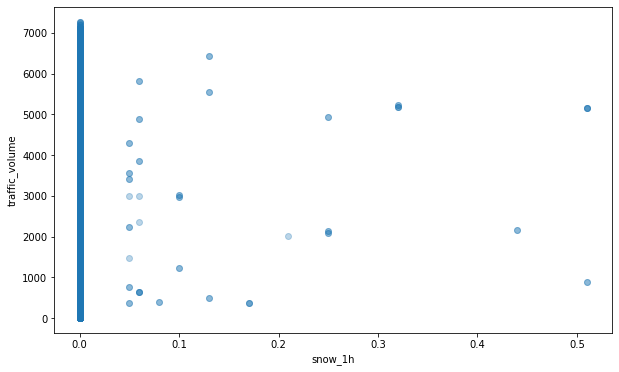

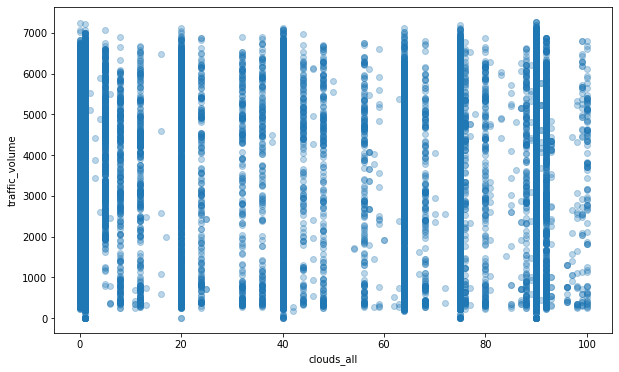

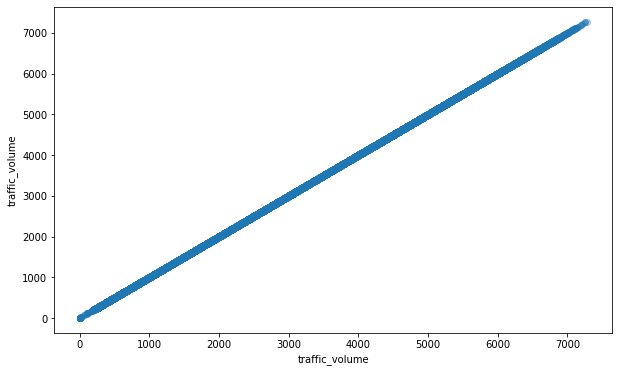

In [ ]:
for feature in features_n:
        data=train.copy()
        plt.figure(figsize=(10,6))
        plt.scatter(data[feature],data['traffic_volume'],alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('traffic_volume')
        plt.show()

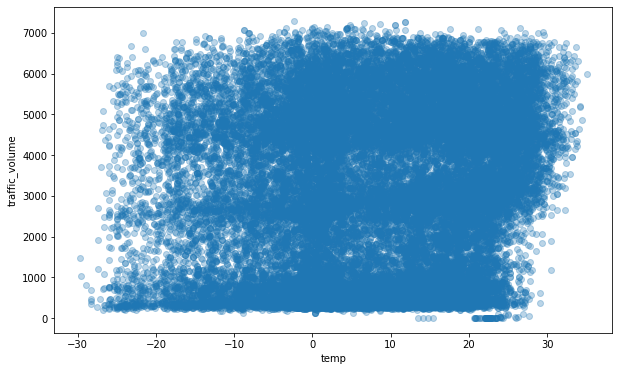

In [ ]:
plt.figure(figsize=(10,6))
data=train.loc[train.temp>-50]
plt.scatter(data['temp'],data['traffic_volume'],alpha=0.3)
plt.xlabel('temp')
plt.ylabel('traffic_volume')
plt.show()

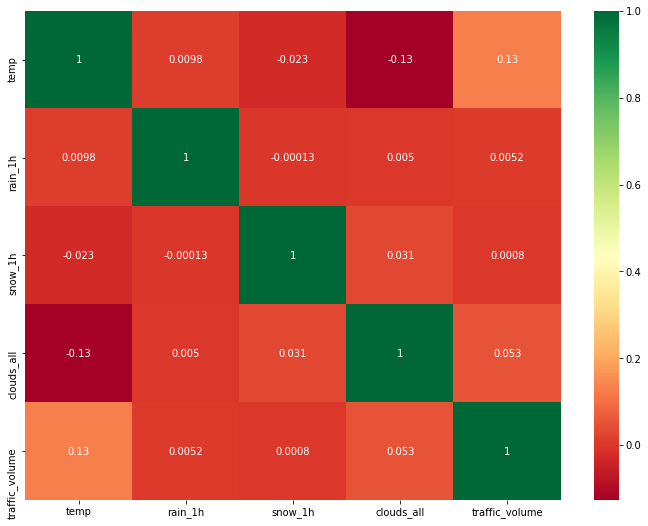

In [ ]:
#lets plot coorelation
plt.figure(figsize = (12,9))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Feature engineering and Data cleaning

In [ ]:
#copying data to new data frame
df = train.copy()

In [ ]:
df.columns

Index(['date_time', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume'],
      dtype='object')

In [ ]:
#Extracting features from date_time variable
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday
df['date'] = df.date_time.dt.date
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year
#Monday is 0 and Sunday is 6

In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
0,2012-10-02 09:00:00,None,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,1,2012-10-02,9,10,2012
1,2012-10-02 10:00:00,None,16.21,0.0,0.0,75,Clouds,broken clouds,4516,1,2012-10-02,10,10,2012
2,2012-10-02 11:00:00,None,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,1,2012-10-02,11,10,2012
3,2012-10-02 12:00:00,None,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,1,2012-10-02,12,10,2012
4,2012-10-02 13:00:00,None,17.99,0.0,0.0,75,Clouds,broken clouds,4918,1,2012-10-02,13,10,2012


In [ ]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df['hour'] = df.hour.map(hour_modify)

In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
0,2012-10-02 09:00:00,None,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,1,2012-10-02,Morning,10,2012
1,2012-10-02 10:00:00,None,16.21,0.0,0.0,75,Clouds,broken clouds,4516,1,2012-10-02,Morning,10,2012
2,2012-10-02 11:00:00,None,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,1,2012-10-02,Morning,10,2012
3,2012-10-02 12:00:00,None,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,1,2012-10-02,Afternoon,10,2012
4,2012-10-02 13:00:00,None,17.99,0.0,0.0,75,Clouds,broken clouds,4918,1,2012-10-02,Afternoon,10,2012


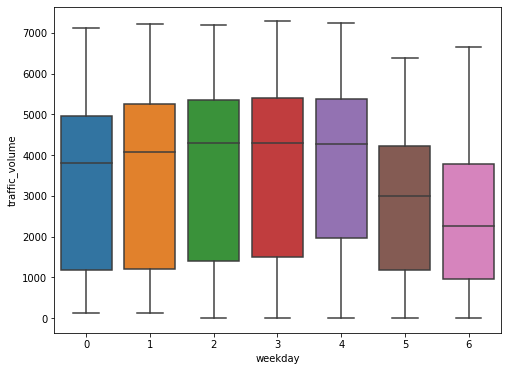

In [ ]:
#Traffic volume plotted against weekday. Weekends show less traffic volume.
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df)
plt.show()
# 5 & 6 are weekends

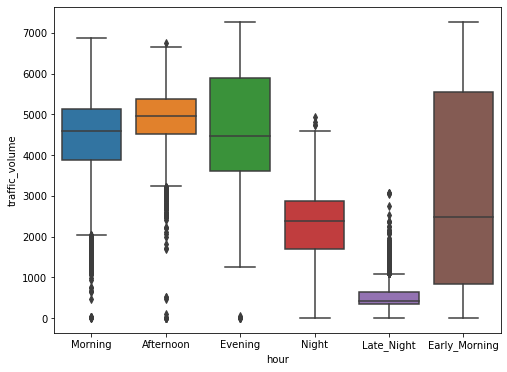

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hour', y='traffic_volume', data = df)
plt.show()

In [ ]:
df.columns

Index(['date_time', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume', 'weekday',
       'date', 'hour', 'month', 'year'],
      dtype='object')

In [ ]:
gby_year =df.groupby('year').mean()
gby_year_median = df.groupby('year').median()

#mean and median of 
tr1 = go.Scatter(x=gby_year.index,y=gby_year['traffic_volume'],name='Mean')
tr2 = go.Scatter(x=gby_year_median.index,y=gby_year_median['traffic_volume'],name='Median')

layout = dict(title='Average traffic_volume  Over The Years',yaxis_title='Mean traffic_volume',xaxis_title='Year')
fig = go.Figure(data=[tr1,tr2],layout=layout)


fig.show()

In [ ]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df['holiday'] = df['holiday'].map(modify_holiday)

In [ ]:
#Outlier in temp which was detected earlier needs to be removed
df = df.loc[df.temp>-250]

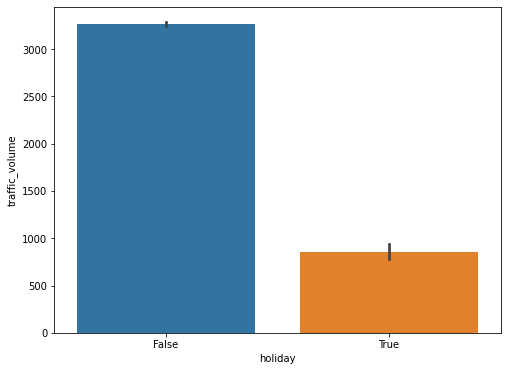

In [ ]:
#Traffic volume difference during holiday and non holiday
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df)
plt.show()

In [ ]:
#clouds, rain and snow distribution over different weather conditions
df.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume        ...     rain_1h   snow_1h
                                              mean  size  ...        mean      mean
weather_description                                       ...                      
SQUALLS                                2061.750000     4  ...    3.482500  0.000000
Sky is Clear                           3420.036215  1712  ...    0.000000  0.000000
broken clouds                          3564.464037  3879  ...    0.000000  0.000000
drizzle                                3073.518051   554  ...    0.116986  0.000000
few clouds                             3619.433255  1708  ...    0.000000  0.000000
fog                                    2833.751804   693  ...    0.071558  0.000823
freezing rain                          4314.000000     2  ...    0.000000  0.000000
haze                                   3574.350453   993  ...    0.037100  0.000000
heavy intensity drizzle                3206.375000    56  ...    0.101071  0.000000
heavy intensity rain                   3057.023256   387  ...    2.936770  0.000000
heavy snow                             3085.862010   587  ...    0.001295  0.000000
light intensity drizzle                3338.663605   871  ...    0.170034  0.000000
light intensity shower rain            4351.545455    11  ...    0.393636  0.000000
light rain                             3359.250089  2795  ...    0.134544  0.000082
light rain and snow                    3961.166667     6  ...    0.211667  0.000000
light shower snow                      4570.750000     4  ...    0.000000  0.000000
light snow                             3045.698027  1318  ...    0.049196  0.002269
mist                                   2951.615268  4611  ...    0.251527  0.000939
moderate rain                          3171.570143  1333  ...    0.541028  0.000623
overcast clouds                        3339.694561  4302  ...    0.000000  0.000000
proximity shower rain                  4501.202128    94  ...    0.080532  0.000000
proximity thunderstorm                 3005.149284   489  ...    1.322311  0.000000
proximity thunderstorm with drizzle    3131.500000    12  ...    0.310000  0.000000
proximity thunderstorm with rain       2507.026316    38  ...    0.586053  0.000000
scattered clouds                       3875.658904  2791  ...    0.000000  0.000000
shower drizzle                         2010.000000     1  ...    0.000000  0.000000
shower snow                            5664.000000     1  ...    0.000000  0.000000
sky is clear                           3023.134193  8838  ...    0.000000  0.000000
sleet                                  3882.000000     2  ...    0.000000  0.000000
smoke                                  3103.722222    18  ...    0.585556  0.000000
snow                                   2808.035176   199  ...    0.028492  0.008894
thunderstorm                           2701.500000    88  ...    1.130341  0.000000
thunderstorm with drizzle              2297.000000     2  ...    5.345000  0.000000
thunderstorm with heavy rain           2603.857143    56  ...    3.294821  0.000000
thunderstorm with light drizzle        2463.375000     8  ...    1.002500  0.000000
thunderstorm with light rain           2673.926829    41  ...    0.867317  0.000000
thunderstorm with rain                 3456.322581    31  ...    2.028387  0.000000
very heavy rain                        2568.833333    18  ...  570.208333  0.000000

[38 rows x 5 columns]

In [ ]:
df['weather_description'] = df['weather_description'].map(lambda x:x.lower())

In [ ]:
#The weather description mostly describes rain, snow, thunderstorms, fog, mist and haze.

#I will create following new columns:
#thunderstorm - True where weather description contains Thunderstorm else False
#fog - True where weather description contains fog else False
#mist - True where weather description contains mist else False
#haze - True where weather description contains haze else False

In [ ]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df.loc[df['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'

In [ ]:
weather = ['thunderstorm','mist','fog','haze']
df.loc[np.logical_not(df['weather_description'].isin(weather)),'weather_description'] = 'other'

In [ ]:
df.weather_description.value_counts()

other           31491
mist             4611
haze              993
thunderstorm      765
fog               693
Name: weather_description, dtype: int64

In [ ]:
#creating dummy variables for these newly created categories in weather description
df = pd.get_dummies(columns=['weather_description'],data=df)

In [ ]:
df.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)


In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,2012-10-02 09:00:00,False,15.13,0.0,0.0,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,2012-10-02 10:00:00,False,16.21,0.0,0.0,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,2012-10-02 11:00:00,False,16.43,0.0,0.0,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,2012-10-02 12:00:00,False,16.98,0.0,0.0,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,2012-10-02 13:00:00,False,17.99,0.0,0.0,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


 **outlier removal**

In [ ]:
#Outlier in temp which was detected earlier needs to be removed
df= df.loc[df.temp>-250]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



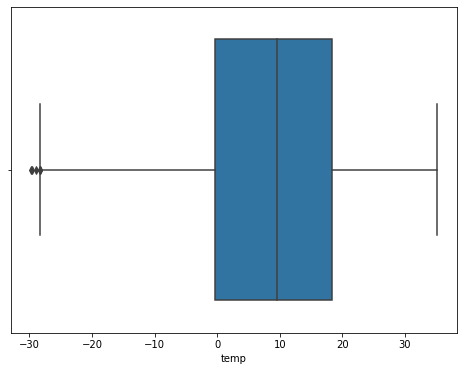

In [ ]:
#distribution after removing the outlier
plt.figure(figsize=(8,6))
sns.boxplot('temp',data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



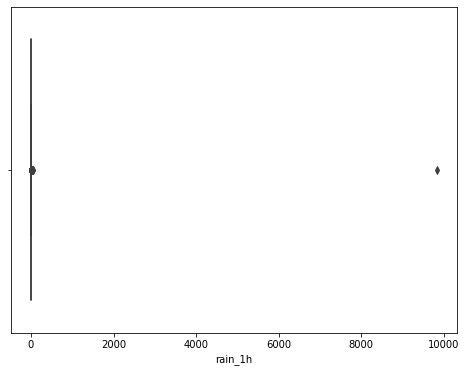

In [ ]:
#Plotiing rain data shows one outlier data point. Lets remove it.
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



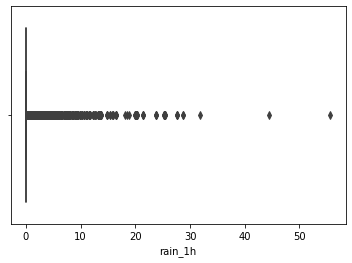

In [ ]:
sns.boxplot('rain_1h',data = df.loc[df.rain_1h<2000])

In [ ]:
df.columns

Index(['date_time', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'traffic_volume', 'weekday', 'date', 'hour', 'month', 'year', 'fog',
       'haze', 'mist', 'thunderstorm'],
      dtype='object')

In [ ]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df = df.loc[df.rain_1h<2000]
df_1 = df.loc[df.rain_1h>0]
#we are dividing them into 3 groups
rain_q = pd.DataFrame(pd.qcut(df_1['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
df_traffic_cat = df.merge(rain_q,left_index=True, right_index=True, how='left')
df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,date_time,holiday,temp,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2012-10-02 09:00:00,False,15.13,0.0,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,2012-10-02 10:00:00,False,16.21,0.0,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,2012-10-02 11:00:00,False,16.43,0.0,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,2012-10-02 12:00:00,False,16.98,0.0,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,2012-10-02 13:00:00,False,17.99,0.0,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



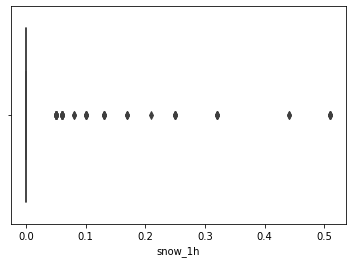

In [ ]:
#Plotiing snow data shows that it is extremely skewed as observed during univariate analysis
sns.boxplot('snow_1h',data = df)

In [ ]:
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow and 
df.snow_1h[df.snow_1h>0].count()
#63 columns -> change to snow, no_snow

63

In [ ]:
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})

In [ ]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_traffic_cat['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,2012-10-02 09:00:00,False,15.13,0.0,0.0,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,2012-10-02 10:00:00,False,16.21,0.0,0.0,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,2012-10-02 11:00:00,False,16.43,0.0,0.0,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,2012-10-02 12:00:00,False,16.98,0.0,0.0,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,2012-10-02 13:00:00,False,17.99,0.0,0.0,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


In [ ]:
df_traffic_cat.head()

,date_time,holiday,temp,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2012-10-02 09:00:00,False,15.13,no_snow,40,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,2012-10-02 10:00:00,False,16.21,no_snow,75,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,2012-10-02 11:00:00,False,16.43,no_snow,90,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,2012-10-02 12:00:00,False,16.98,no_snow,90,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,2012-10-02 13:00:00,False,17.99,no_snow,75,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


In [ ]:
df_traffic_cat.rain_1h.unique()

['no_rain', 'light', 'moderate', 'heavy']
Categories (4, object): ['light' < 'moderate' < 'heavy' < 'no_rain']

In [ ]:
df_traffic_cat.snow_1h.unique()

array(['no_snow', 'snow'], dtype=object)

In [ ]:
df_traffic_cat['rain_1h']= df_traffic_cat['rain_1h'].map({"no_rain":0,'light':1,"moderate":2,"heavy":3})

In [ ]:
df_traffic_cat.rain_1h=pd.to_numeric(df_traffic_cat.rain_1h)

In [ ]:
df_traffic_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38552 entries, 0 to 38562
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       38552 non-null  datetime64[ns]
 1   holiday         38552 non-null  bool          
 2   temp            38552 non-null  float64       
 3   snow_1h         38552 non-null  object        
 4   clouds_all      38552 non-null  int64         
 5   traffic_volume  38552 non-null  int64         
 6   weekday         38552 non-null  int64         
 7   date            38552 non-null  object        
 8   hour            38552 non-null  object        
 9   month           38552 non-null  int64         
 10  year            38552 non-null  int64         
 11  fog             38552 non-null  uint8         
 12  haze            38552 non-null  uint8         
 13  mist            38552 non-null  uint8         
 14  thunderstorm    38552 non-null  uint8         
 15  ra

In [ ]:
df_traffic_cat.hour.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night',
       'Early_Morning'], dtype=object)

In [ ]:
df_traffic_cat.hour=df_traffic_cat['hour'].map({"Late_Night":0,'Night':1,"Early_Morning":2,"Evening":3,'Morning':4,'Afternoon':5})

In [ ]:
df_traffic_cat.hour.unique()

array([4, 5, 3, 1, 0, 2])

In [ ]:
df_traffic_cat.snow_1h=df_traffic_cat['snow_1h'].map({"no_snow":0,'snow':1})

In [ ]:
 #df_traffic_cat.holiday=df_traffic_cat['holiday'].map({"False":0,'True':1})

In [ ]:
df_traffic_cat.holiday.unique()

array([False,  True])

In [ ]:
df_traffic_cat.holiday=df_traffic_cat.holiday.map({False:0,True:1})

In [ ]:
df_traffic_cat.head()

,date_time,holiday,temp,snow_1h,clouds_all,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2012-10-02 09:00:00,0,15.13,0,40,5545,1,2012-10-02,4,10,2012,0,0,0,0,0
1,2012-10-02 10:00:00,0,16.21,0,75,4516,1,2012-10-02,4,10,2012,0,0,0,0,0
2,2012-10-02 11:00:00,0,16.43,0,90,4767,1,2012-10-02,4,10,2012,0,0,0,0,0
3,2012-10-02 12:00:00,0,16.98,0,90,5026,1,2012-10-02,5,10,2012,0,0,0,0,0
4,2012-10-02 13:00:00,0,17.99,0,75,4918,1,2012-10-02,5,10,2012,0,0,0,0,0


In [ ]:
#setting date as index
#df_traffic_cat.set_index('date', inplace = True)

In [ ]:
df_traffic_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38552 entries, 0 to 38562
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       38552 non-null  datetime64[ns]
 1   holiday         38552 non-null  int64         
 2   temp            38552 non-null  float64       
 3   snow_1h         38552 non-null  int64         
 4   clouds_all      38552 non-null  int64         
 5   traffic_volume  38552 non-null  int64         
 6   weekday         38552 non-null  int64         
 7   date            38552 non-null  object        
 8   hour            38552 non-null  int64         
 9   month           38552 non-null  int64         
 10  year            38552 non-null  int64         
 11  fog             38552 non-null  uint8         
 12  haze            38552 non-null  uint8         
 13  mist            38552 non-null  uint8         
 14  thunderstorm    38552 non-null  uint8         
 15  ra

In [ ]:
X=df_traffic_cat.drop(['date_time','traffic_volume','date'],axis=1)
y=df_traffic_cat.traffic_volume

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1= sc.fit_transform(X)
#X_test = sc.transform(X_test_true)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

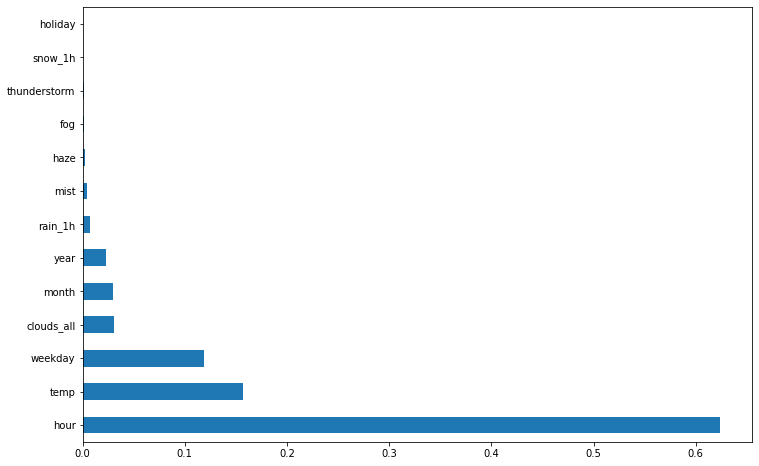

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Testdata

In [ ]:
test=pd.read_csv(url1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            9641 non-null   object 
 1   holiday              9641 non-null   object 
 2   temp                 9641 non-null   float64
 3   rain_1h              9641 non-null   float64
 4   snow_1h              9641 non-null   float64
 5   clouds_all           9641 non-null   int64  
 6   weather_main         9641 non-null   object 
 7   weather_description  9641 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 602.7+ KB


In [ ]:
test['date_time'] = pd.to_datetime(test.date_time)
test['weekday'] = test.date_time.dt.weekday
test['date'] = test.date_time.dt.date
test['hour'] = test.date_time.dt.hour
test['month'] = test.date_time.dt.month
test['year'] = test.date_time.dt.year

In [ ]:
test.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,weekday,date,hour,month,year
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist,2,2017-11-01,20,11,2017
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain,2,2017-11-01,20,11,2017
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist,2,2017-11-01,21,11,2017
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle,2,2017-11-01,21,11,2017
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist,2,2017-11-01,22,11,2017


In [ ]:
test['hour'] = test.hour.map(hour_modify)

test['holiday'] = test['holiday'].map(modify_holiday)

In [ ]:
test['weather_description'] = test['weather_description'].map(lambda x:x.lower())



In [ ]:
test['rain_1h']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9636    0.0
9637    0.0
9638    0.0
9639    0.0
9640    0.0
Name: rain_1h, Length: 9641, dtype: float64

In [ ]:
df25= test.loc[test.rain_1h>0.25]

rain_q = pd.DataFrame(pd.qcut(df25['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
test_c = test.merge(rain_q,left_index=True, right_index=True, how='left')
test_c['rain_1h_y'] = test_c.rain_1h_y.cat.add_categories('no_rain')
test_c['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

test_c.drop(columns=['rain_1h_x'], inplace = True)
test_c.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
test_c.head()

,date_time,holiday,temp,snow_1h,clouds_all,weather_main,weather_description,weekday,date,hour,month,year,rain_1h
0,2017-11-01 20:00:00,False,274.75,0.0,90,Mist,mist,2,2017-11-01,Night,11,2017,no_rain
1,2017-11-01 20:00:00,False,274.75,0.0,90,Rain,light rain,2,2017-11-01,Night,11,2017,no_rain
2,2017-11-01 21:00:00,False,274.79,0.0,90,Mist,mist,2,2017-11-01,Night,11,2017,no_rain
3,2017-11-01 21:00:00,False,274.79,0.0,90,Drizzle,drizzle,2,2017-11-01,Night,11,2017,no_rain
4,2017-11-01 22:00:00,False,275.08,0.0,90,Mist,mist,2,2017-11-01,Night,11,2017,no_rain


In [ ]:
test_c.rain_1h.unique()

['no_rain', 'light', 'moderate', 'heavy']
Categories (4, object): ['light' < 'moderate' < 'heavy' < 'no_rain']

In [ ]:
test_c['snow_1h'] = test_c.snow_1h.map(modify_snow1h)

In [ ]:
test_c['rain_1h']= test_c['rain_1h'].map({"no_rain":0,'light':1,"moderate":2,"heavy":3})

test_c.rain_1h=pd.to_numeric(test_c.rain_1h)

test_c.snow_1h=test_c['snow_1h'].map({"no_snow":0,'snow':1})

test_c.holiday=test_c.holiday.map({False:0,True:1})



In [ ]:
test_c.hour=test_c['hour'].map({"Late_Night":0,'Night':1,"Early_Morning":2,"Evening":3,'Morning':4,'Afternoon':5})

In [ ]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
test_c.loc[test_c['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'

weather = ['thunderstorm','mist','fog','haze']
test_c.loc[np.logical_not(test_c['weather_description'].isin(weather)),'weather_description'] = 'other'

test_c= pd.get_dummies(columns=['weather_description'],data=test_c)

test_c.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
test_c.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)


In [ ]:
test_c.head()

,date_time,holiday,temp,snow_1h,clouds_all,weekday,date,hour,month,year,rain_1h,fog,haze,mist,thunderstorm
0,2017-11-01 20:00:00,0,274.75,0,90,2,2017-11-01,1,11,2017,0,0,0,1,0
1,2017-11-01 20:00:00,0,274.75,0,90,2,2017-11-01,1,11,2017,0,0,0,0,0
2,2017-11-01 21:00:00,0,274.79,0,90,2,2017-11-01,1,11,2017,0,0,0,1,0
3,2017-11-01 21:00:00,0,274.79,0,90,2,2017-11-01,1,11,2017,0,0,0,0,0
4,2017-11-01 22:00:00,0,275.08,0,90,2,2017-11-01,1,11,2017,0,0,0,1,0


In [ ]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_time     9641 non-null   datetime64[ns]
 1   holiday       9641 non-null   int64         
 2   temp          9641 non-null   float64       
 3   snow_1h       9641 non-null   int64         
 4   clouds_all    9641 non-null   int64         
 5   weekday       9641 non-null   int64         
 6   date          9641 non-null   object        
 7   hour          9641 non-null   int64         
 8   month         9641 non-null   int64         
 9   year          9641 non-null   int64         
 10  rain_1h       9641 non-null   int64         
 11  fog           9641 non-null   uint8         
 12  haze          9641 non-null   uint8         
 13  mist          9641 non-null   uint8         
 14  thunderstorm  9641 non-null   uint8         
dtypes: datetime64[ns](1), float64(1), int6

In [ ]:
TEST=test_c.drop(['date_time','date'],axis=1)


In [ ]:
TEST.shape

(9641, 13)

In [ ]:
t1= sc.fit_transform(TEST)

In [ ]:
t1

array([[-0.03674546, -0.42561304,  0.        , ..., -0.19892964,
         2.49000991, -0.16941818],
       [-0.03674546, -0.42561304,  0.        , ..., -0.19892964,
        -0.40160483, -0.16941818],
       [-0.03674546, -0.42271393,  0.        , ..., -0.19892964,
         2.49000991, -0.16941818],
       ...,
       [-0.03674546,  0.15275831,  0.        , ..., -0.19892964,
        -0.40160483,  5.90255442],
       [-0.03674546,  0.10637263,  0.        , ..., -0.19892964,
        -0.40160483, -0.16941818],
       [-0.03674546,  0.10854696,  0.        , ..., -0.19892964,
        -0.40160483, -0.16941818]])

# model bulding

In [ ]:
#i am not dropping the nonimportant features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42,shuffle=True)

In [ ]:
X_train.shape

(30841, 13)

**Random forest**

In [ ]:
from sklearn.model_selection import cross_val_score
scoring = 'RMSE'
#score = cross_val_score(clf, X_train, y_train, n_jobs=1, scoring=scoring)
#print(score)

In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#scoring = ''
#score = cross_val_score(reg_rf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)

In [ ]:
reg_rf.score(X_train, y_train)

0.9623058515110057

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_test, y_test)

0.7520714348373796

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(RMSE)

990.3527245878241


In [ ]:
pr=reg_rf.predict(t1)

In [ ]:
pr

array([2215.29133333, 2215.29133333, 2082.35633333, ..., 1961.18      ,
       1755.488     , 1755.488     ])

In [ ]:
final_data1 = {'index':test.index,'traffic_volume': pr}
submission1 = pd.DataFrame(data=final_data1)

In [ ]:
submission1

,index,traffic_volume
0,0,2215.291333
1,1,2215.291333
2,2,2082.356333
3,3,2082.356333
4,4,1772.768500
...,...,...
9636,9636,4023.415000
9637,9637,2153.050000
9638,9638,1961.180000
9639,9639,1755.488000


In [ ]:
submission1.to_csv('submission.csv', index =False)

**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model.score(X_train, y_train)

0.7344897548899829

In [ ]:
y_pred1 = model.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred=y_pred1,y_true=y_test))
print(RMSE)

1028.1744286110688


**XGBRegressor**

In [ ]:
from xgboost import XGBRegressor

model1 = XGBRegressor()
# fit the model on the whole dataset
model1.fit(X_train, y_train)

[08:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model1.score(X_train, y_train)

0.7342177336619988

In [ ]:
y_pred2 = model1.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred=y_pred2,y_true=y_test))
print(RMSE)

1028.222847343244


# Hyperparametertuning